In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats

In [191]:
df_audio_features = pd.read_csv('df_audio_features_5000.csv')
df_audio_features.head(2)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.658,0.259,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,Saudade De Bahia ...,Antônio Carlos Jobim,0.742,0.399,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...


In [192]:
#to remove non-int value
df_audio_features = df_audio_features.drop(df_audio_features.columns[[13, 16, 17]],axis = 1)

In [193]:
#to remove multiple spaces
df_audio_features.columns  = df_audio_features.columns.str.replace("^[ ]+|[ ]+$", "", regex=True)

In [194]:
df_audio_features.rename(columns={df_audio_features.columns[1]:"artist"}, inplace = True)
df_audio_features.rename(columns={df_audio_features.columns[0]:"name"}, inplace = True)
df_audio_features.rename(columns={df_audio_features.columns[2]:"danceability"}, inplace = True)
df_audio_features.rename(columns={df_audio_features.columns[3]:"energy"}, inplace = True)
df_audio_features.rename(columns={df_audio_features.columns[4]:"key"}, inplace = True)
df_audio_features.rename(columns={df_audio_features.columns[5]:"loudness"}, inplace = True)

In [195]:
# set indexes
df_audio_features.set_index(["name", "artist"], inplace=True)

In [196]:
#outliers remove (confidenace interval removed)

df_audio_features_with_outliers = df_audio_features[(np.abs(stats.zscore(df_audio_features)) < 3).all(axis=1)]
df_audio_features_with_outliers.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,191867,4
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,186227,4
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,273680,4
Desafinado,Stan Getz,0.466,0.1460,3,-17.500,1,0.0649,0.931,0.154000,0.107,0.423,142.885,249387,4
Madalena,Maria Gasolina,0.675,0.2070,11,-13.820,0,0.0545,0.963,0.414000,0.112,0.684,93.531,145187,4


# using minmax scalar(data scaling)

In [197]:
df_audio_features_with_outliers.shape

(4747, 13)

In [198]:
 # 1. import the transformer
from sklearn.preprocessing import MinMaxScaler
 
# 2. initialize the transformer (optionally, set parameters)
my_min_max = MinMaxScaler(feature_range=(0,1))

# 3. fit the transformer to the data
my_min_max.fit(df_audio_features_with_outliers)  #my_min_max = MinMaxScaler(feature_range=(0,1)).fit_transform(df_audio_features_with_outliers)
 
# 4. use the transformer to transform the data
df_MinMaxScaler_scaled = my_min_max.transform(df_audio_features_with_outliers)
df_MinMaxScaler_scaled

 # 5. reconvert the transformed data back to a DataFrame
df_MinMaxScaler = pd.DataFrame(df_MinMaxScaler_scaled,
             index=df_audio_features_with_outliers.index,
             columns=df_audio_features_with_outliers.columns)
df_MinMaxScaler.head(2)

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5


# for selecting cluster assume n = 30

In [199]:
# 1. import the model for  clusters
from sklearn.cluster import KMeans
 
# 2. initialize the model
df_MinMaxScaler_kmeans = KMeans(n_clusters= 30)
 
# 3. fit the model to the data
df_MinMaxScaler_kmeans.fit(df_MinMaxScaler_scaled) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = df_MinMaxScaler_kmeans.predict(df_MinMaxScaler_scaled) # pass your scaled data here
 
# 5. attach the cluster output to our original DataFrame
df_MinMaxScaler["cluster"] = clusters

In [200]:
df_MinMaxScaler.groupby(by="cluster").mean().head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.574660,0.697930,0.125799,0.749017,1.0,0.091842,0.119948,0.019268,0.213383,0.334278,0.491462,0.334551,0.481081
1,0.617820,0.488697,0.335901,0.629134,0.0,0.115411,0.653062,0.046334,0.227895,0.600289,0.461377,0.342187,0.474576
2,0.532211,0.702273,0.739669,0.734718,1.0,0.098532,0.121329,0.031017,0.223901,0.322333,0.496099,0.341272,0.490909
3,0.213504,0.910961,0.710606,0.677095,1.0,0.295535,0.006823,0.807690,0.290934,0.201718,0.469907,0.362642,0.481250
4,0.320317,0.163351,0.703115,0.313710,1.0,0.085770,0.946115,0.874793,0.177742,0.180701,0.449737,0.352495,0.339161


In [201]:
centroids = df_MinMaxScaler_kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.574660,0.697930,0.125799,0.749017,1.000000e+00,0.091842,0.119948,0.019268,0.213383,0.334278,0.491462,0.334551,0.481081
1,0.617820,0.488697,0.335901,0.629134,-1.110223e-16,0.115411,0.653062,0.046334,0.227895,0.600289,0.461377,0.342187,0.474576
2,0.532211,0.702273,0.739669,0.734718,1.000000e+00,0.098532,0.121329,0.031017,0.223901,0.322333,0.496099,0.341272,0.490909
3,0.213504,0.910961,0.710606,0.677095,1.000000e+00,0.295535,0.006823,0.807690,0.290934,0.201718,0.469907,0.362642,0.481250
4,0.320317,0.163351,0.703115,0.313710,1.000000e+00,0.085770,0.946115,0.874793,0.177742,0.180701,0.449737,0.352495,0.339161


In [202]:
df_MinMaxScaler_kmeans.inertia_

1101.2550617543234

In [203]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance = pd.DataFrame(pairwise_distances(centroids), index=centroids.index,
                                  columns=centroids.index)

euclidean_distance.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,1.208980,0.616007,1.106222e+00,1.528013e+00,1.275688,1.016209,1.777252,1.536873,0.935537,...,1.434977,0.831294,0.656451,0.836536,0.962588,1.352355,1.437489,1.120123,0.555958,0.440018
1,1.208980,0.000000,1.260606,1.636332e+00,1.548854e+00,1.067615,0.739744,1.150359,1.298817,1.350521,...,0.544591,1.391395,1.249788,1.487179,1.161144,1.175903,1.540530,0.633516,1.136900,1.237238
2,0.616007,1.260606,0.000000,9.081353e-01,1.397786e+00,1.119174,1.138720,1.725693,1.326610,0.688743,...,1.367530,0.838569,0.614429,0.525229,1.112473,1.396922,1.537250,1.210779,0.711834,0.796492
3,1.106222,1.636332,0.908135,4.214685e-08,1.291186e+00,1.223733,1.431386,1.629728,1.021514,1.152498,...,1.724691,0.655988,1.127348,0.707800,1.503743,1.092885,1.421692,1.583443,1.281563,1.243754
4,1.528013,1.548854,1.397786,1.291186e+00,2.980232e-08,1.824077,1.851571,1.019830,1.615975,1.622665,...,1.343711,1.304834,1.602678,1.543497,1.013833,1.651350,0.567787,1.918890,1.543946,1.708086


<AxesSubplot:>

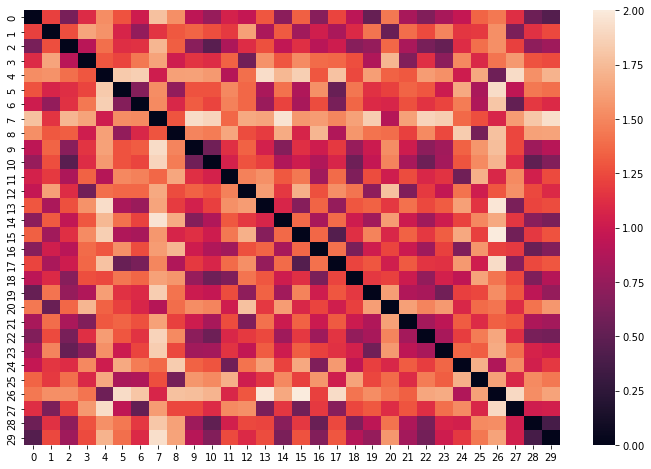

In [204]:
plt.subplots(figsize=(12, 8))
sns.heatmap(euclidean_distance)

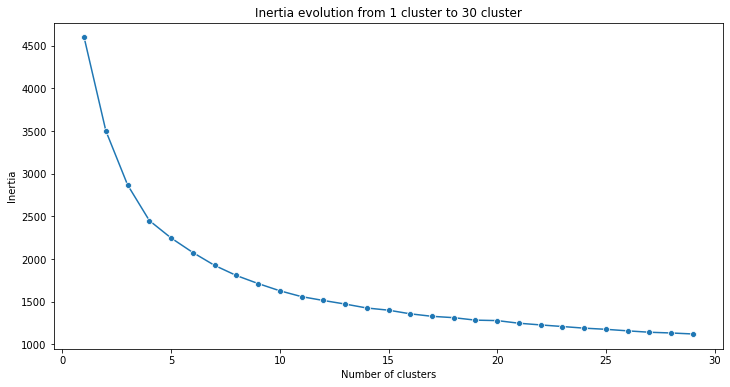

In [205]:
max_k = 30
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(df_MinMaxScaler_scaled).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [208]:
from sklearn.metrics import silhouette_score
silhouette_score(df_MinMaxScaler_scaled, df_MinMaxScaler_kmeans.labels_) #k=4

0.15564282516975378

# after selecting clusters (using elbow method) k = 5

In [209]:
# 1. import the model for  clusters
from sklearn.cluster import KMeans
 
# 2. initialize the model
df_MinMaxScaler_kmeans = KMeans(n_clusters= 5)
 
# 3. fit the model to the data
df_MinMaxScaler_kmeans.fit(df_MinMaxScaler_scaled) # pass your scaled data here
 
# 4. obtain the cluster output
clusters = df_MinMaxScaler_kmeans.predict(df_MinMaxScaler_scaled) # pass your scaled data here
 
# 5. attach the cluster output to our original DataFrame
df_MinMaxScaler["cluster"] = clusters

In [210]:
df_MinMaxScaler.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
name,artist,,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,0.751491,0.398807,0.181818,0.526649,1.0,0.043892,0.218090,0.000002,0.154725,0.696749,0.510537,0.256812,0.5,4
Mulher Eu Sei,Chico César,0.710625,0.049313,0.363636,0.341579,1.0,0.089612,0.883417,0.000041,0.603929,0.521238,0.397299,0.247708,0.5,2
Rosa Morena,Kurt Elling,0.650983,0.118250,0.545455,0.284322,1.0,0.056328,0.920603,0.000348,0.149895,0.394537,0.485092,0.388865,0.5,2
Desafinado,Stan Getz,0.446653,0.145303,0.272727,0.362390,1.0,0.154718,0.935678,0.156345,0.154725,0.416346,0.621347,0.349654,0.5,2
Madalena,Maria Gasolina,0.677491,0.206425,1.000000,0.486921,0.0,0.116679,0.967839,0.420305,0.162776,0.687403,0.314896,0.181466,0.5,2


In [211]:
clusters

array([4, 2, 2, ..., 2, 2, 2])

In [212]:
df_MinMaxScaler_kmeans

KMeans(n_clusters=5)

In [213]:
df_MinMaxScaler.groupby(by="cluster").mean() 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.296573,0.888369,0.587786,0.691143,0.000000,0.279491,0.023864,0.636681,0.290902,0.234605,0.499815,0.372634,0.452926
1,0.245099,0.909907,0.441829,0.690148,1.000000,0.304830,0.009836,0.590542,0.296665,0.220057,0.489707,0.359800,0.456442
2,0.348703,0.165795,0.476789,0.343761,0.680851,0.080232,0.923528,0.585035,0.199596,0.203647,0.410332,0.361607,0.389818
3,0.659618,0.698638,0.536948,0.729752,0.000000,0.208225,0.210958,0.020294,0.249412,0.575613,0.479205,0.314316,0.490076
4,0.628704,0.686848,0.437092,0.713307,1.000000,0.167131,0.238894,0.021922,0.256260,0.610763,0.481648,0.304570,0.490675


In [214]:
centroids = df_MinMaxScaler_kmeans.cluster_centers_
centroids = pd.DataFrame(centroids)
centroids

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.296573,0.888369,0.587786,0.691143,-1.554312e-15,0.279491,0.023864,0.636681,0.290902,0.234605,0.499815,0.372634,0.452926
1,0.245099,0.909907,0.441829,0.690148,1.000000e+00,0.304830,0.009836,0.590542,0.296665,0.220057,0.489707,0.359800,0.456442
2,0.348703,0.165795,0.476789,0.343761,6.808511e-01,0.080232,0.923528,0.585035,0.199596,0.203647,0.410332,0.361607,0.389818
3,0.659618,0.698638,0.536948,0.729752,-1.998401e-15,0.208225,0.210958,0.020294,0.249412,0.575613,0.479205,0.314316,0.490076
4,0.628704,0.686848,0.437092,0.713307,1.000000e+00,0.167131,0.238894,0.021922,0.256260,0.610763,0.481648,0.304570,0.490675


In [215]:
df_MinMaxScaler_kmeans.inertia_

2248.0853121822524

In [216]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance = pd.DataFrame(pairwise_distances(centroids), index=centroids.index,
                                  columns=centroids.index)

euclidean_distance

,0,1,2,3,4
0,2.980232e-08,1.013859e+00,1.412288,8.456381e-01,1.326648
1,1.013859e+00,2.980232e-08,1.301246,1.316816e+00,0.866485
2,1.412288e+00,1.301246e+00,0.000000,1.413400e+00,1.253288
3,8.456381e-01,1.316816e+00,1.413400,2.980232e-08,1.007567
4,1.326648e+00,8.664848e-01,1.253288,1.007567e+00,0.000000


<AxesSubplot:>

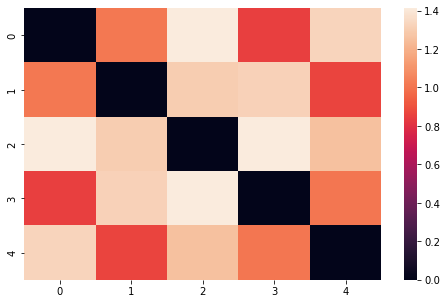

In [217]:
plt.subplots(figsize=(8, 5))
sns.heatmap(euclidean_distance)

In [218]:
from sklearn.metrics import silhouette_score
silhouette_score(df_MinMaxScaler_scaled, df_MinMaxScaler_kmeans.labels_) #k=4

0.2532780213006732

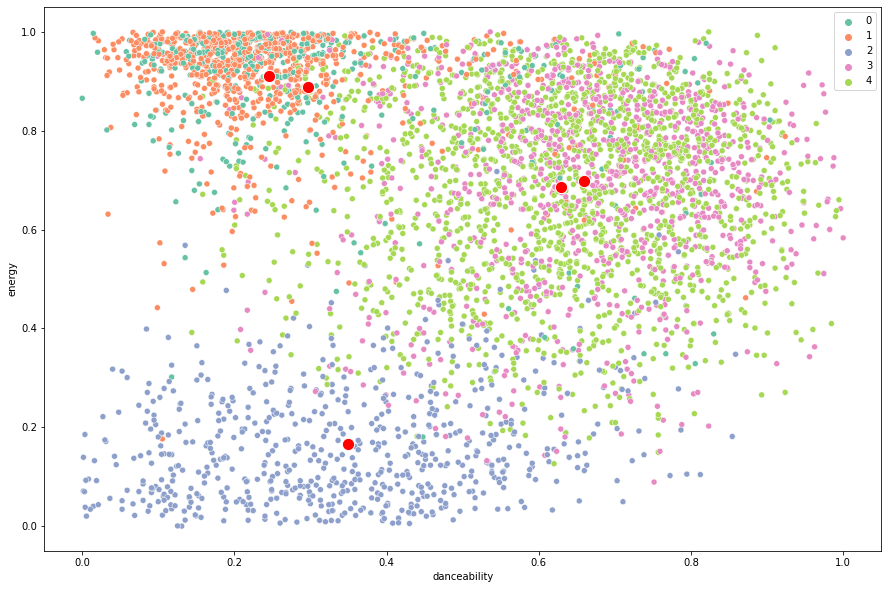

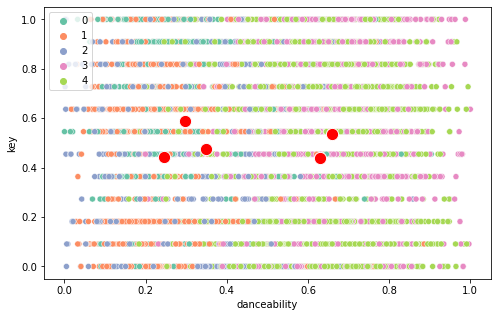

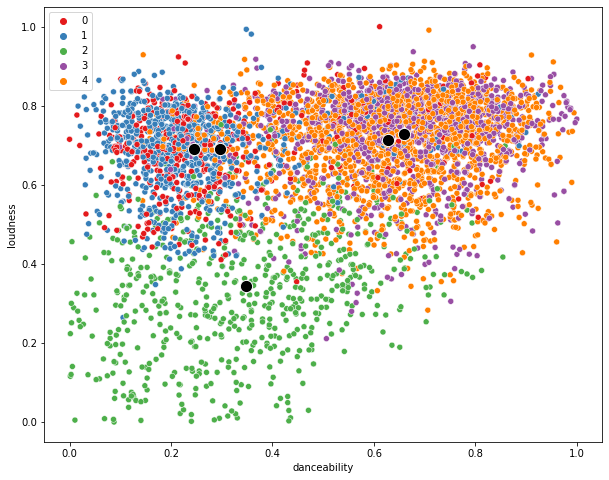

In [231]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids = df_MinMaxScaler_kmeans.cluster_centers_
centroids= pd.DataFrame(centroids)
centroids.columns = columns
centroids.head()

fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=df_MinMaxScaler, x='danceability', y='energy', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='energy', color='red', s=150)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df_MinMaxScaler, x='danceability', y='key', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='danceability', y='key', color='red', s=150)
plt.show()




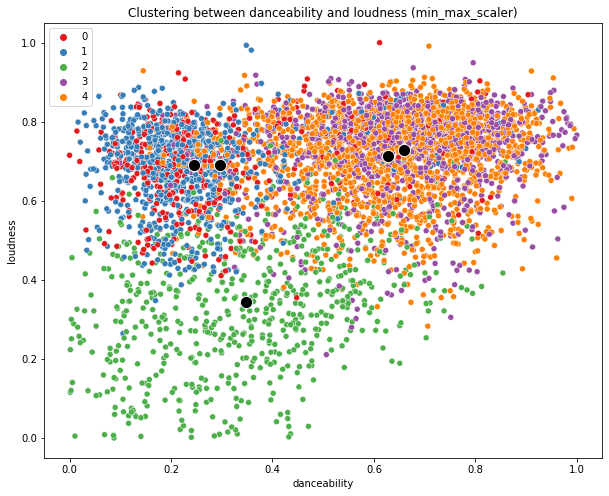

In [237]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df_MinMaxScaler, x='danceability', y='loudness', hue='cluster', palette='Set1')
sns.scatterplot(data=centroids, x='danceability', y='loudness', color='black', s=150)
plt.title("Clustering between danceability and loudness (min_max_scaler)")
plt.show()



In [161]:
df_MinMaxScaler['cluster'].head()

name                                                                                                                                                                               artist                                          
Saudade De Bahia                                                                                                                                                                   Antônio Carlos Jobim                                1
Mulher Eu Sei                                                                                                                                                                      Chico César                                         2
Rosa Morena                                                                                                                                                                        Kurt Elling                                         2
Desafinado                                                               

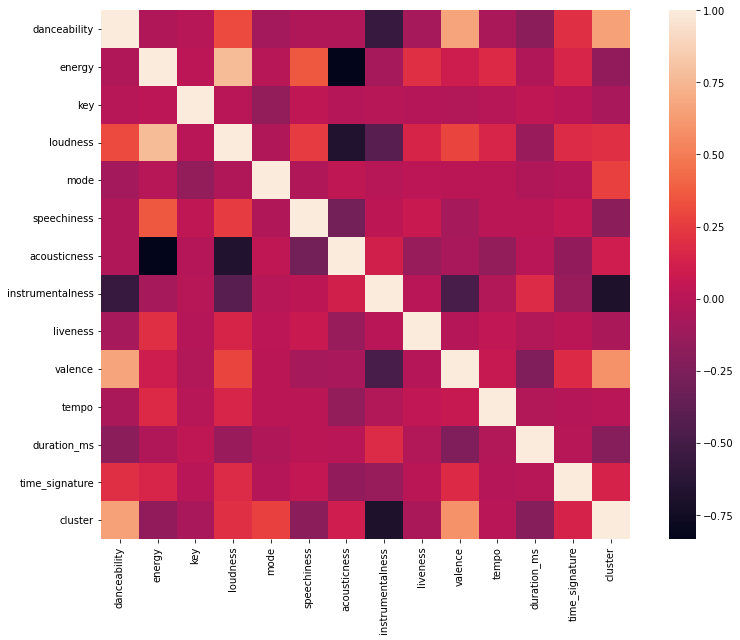

In [219]:
# creating a correlation matrix
corr = df_MinMaxScaler.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()

In [162]:
minmax = (
df_MinMaxScaler.reset_index()
    .groupby(['cluster'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
minmax.rename(columns={'name':'MinMaxScalar'}, inplace=True)
minmax

,cluster,MinMaxScalar
1,1,1823
0,0,1058
3,3,815
2,2,657
4,4,394


In [163]:
#min_max_multi = sns.pairplot(df_audio_features_with_outliers, hue='cluster', palette='husl')

# for standard scalar

In [164]:
df_audio_features_standard = df_audio_features[(np.abs(stats.zscore(df_audio_features)) < 3).all(axis=1)]

In [165]:
# import the transformer by using standard scalar(data scaling)

from sklearn.preprocessing import StandardScaler

df_standard_scaled= StandardScaler().fit_transform(df_audio_features_standard)

 # reconvert the transformed data back to a DataFrame
df_StandardScaler = pd.DataFrame(df_standard_scaled,
                          index=df_audio_features_standard.index,
                          columns=df_audio_features_standard.columns)
df_StandardScaler.head(2)


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Saudade De Bahia,Antônio Carlos Jobim,1.041118,-1.001827,-0.910298,-0.780569,0.733647,-0.769630,-0.152239,-0.673277,-0.557891,0.867386,0.212277,-0.597075,0.222956
Mulher Eu Sei,Chico César,0.869606,-2.282372,-0.351753,-1.864386,0.733647,-0.540088,1.782664,-0.673171,1.900034,0.254700,-0.447534,-0.671580,0.222956


In [166]:
df_standard_kmeans = KMeans(n_clusters = 5).fit(df_standard_scaled)
print(df_standard_kmeans)


df_StandardScaler["cluster"] = df_standard_kmeans.labels_
df_StandardScaler.head()

df_StandardScaler.groupby(by="cluster").mean() 

KMeans(n_clusters=5)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,-0.573747,-1.805796,0.000357,-1.767396,-0.005866,-0.592486,1.820528,0.745852,-0.318265,-0.772653,-0.368447,0.283407,-0.524666
1,-1.132585,0.870029,0.021759,0.164964,0.129575,0.502783,-0.754475,0.901067,0.250748,-0.849692,0.081839,0.339494,-0.128240
2,0.869024,0.279904,-0.017094,0.573708,-0.051152,2.407554,-0.265934,-0.605208,0.128173,0.469688,-0.052229,-0.147666,0.203759
3,0.509397,0.052099,-0.141456,0.301650,0.733647,-0.463921,-0.093949,-0.562427,-0.039118,0.623333,0.083565,-0.275880,0.177139
4,0.635405,0.177364,0.217202,0.468747,-1.363054,-0.280562,-0.263779,-0.502826,-0.035524,0.411358,0.071190,-0.114665,0.193680


In [167]:
centroids_standard = df_standard_kmeans.cluster_centers_
centroids_standard = pd.DataFrame(centroids)
centroids_standard

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.659751,0.697921,0.537034,0.729451,-1.998401e-15,0.207817,0.211794,0.020294,0.249327,0.575724,0.478740,0.314192,0.490076
1,0.628704,0.686848,0.437092,0.713307,1.000000e+00,0.167131,0.238894,0.021922,0.256260,0.610763,0.481648,0.304570,0.490675
2,0.348528,0.165706,0.476823,0.343471,6.818874e-01,0.080202,0.923586,0.585925,0.199563,0.203507,0.410751,0.361818,0.389650
3,0.245099,0.909907,0.441829,0.690148,1.000000e+00,0.304830,0.009836,0.590542,0.296665,0.220057,0.489707,0.359800,0.456442
4,0.296640,0.888609,0.587217,0.691552,-1.443290e-15,0.280131,0.023804,0.635065,0.290953,0.234462,0.500137,0.372589,0.453046


In [168]:
df_standard_kmeans.inertia_

38639.03135803262

<AxesSubplot:>

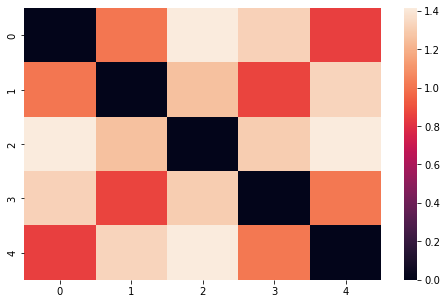

In [169]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance_standard = pd.DataFrame(pairwise_distances(centroids_standard), index=centroids_standard.index,
                                  columns=centroids_standard.index)

euclidean_distance_standard
plt.subplots(figsize=(8, 5))
sns.heatmap(euclidean_distance_standard)

In [170]:
from sklearn.metrics import silhouette_score
silhouette_score(df_standard_scaled, df_standard_kmeans.labels_) #k=4

0.14600193111560364

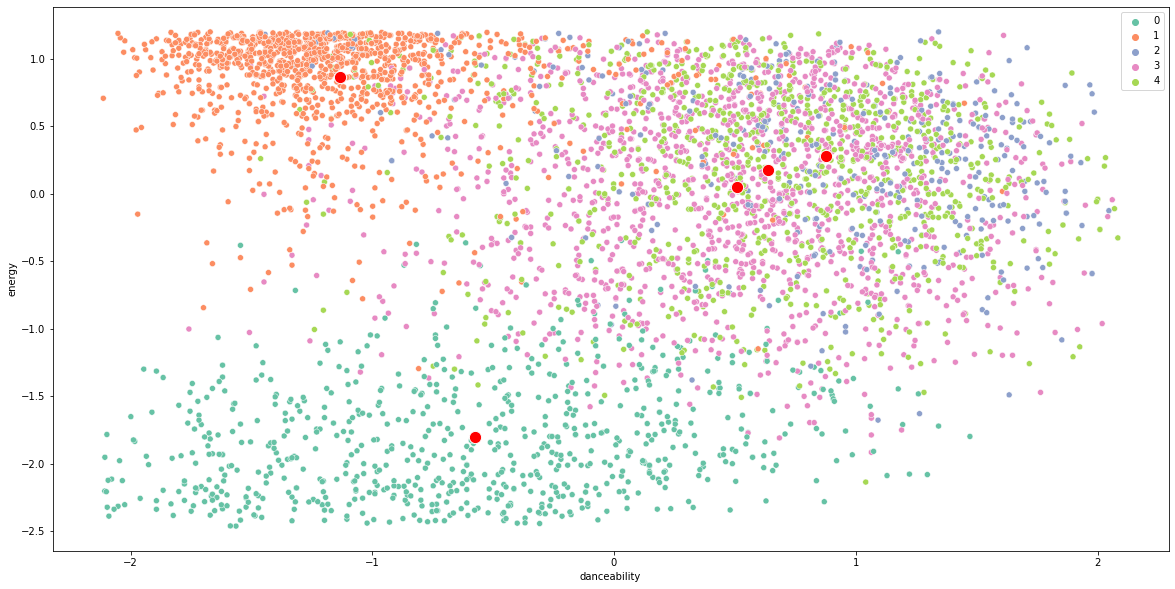

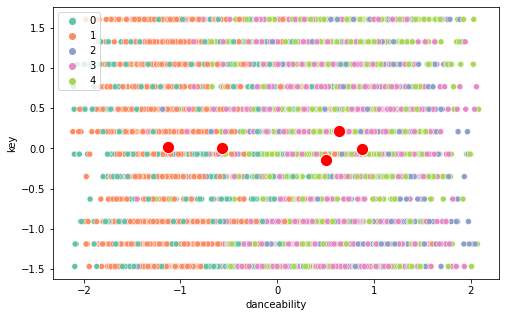

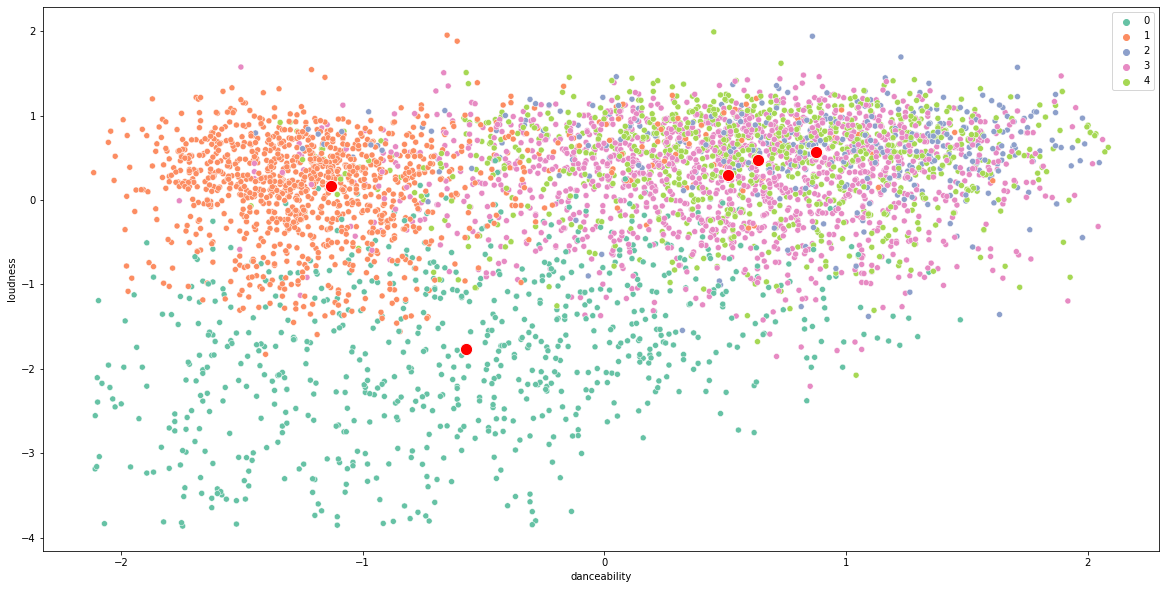

In [171]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_standard = df_standard_kmeans.cluster_centers_
centroids_standard= pd.DataFrame(centroids_standard)
centroids_standard.columns = columns
centroids_standard.head()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_StandardScaler, x='danceability', y='energy', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_standard, x='danceability', y='energy', color='red', s=150)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df_StandardScaler, x='danceability', y='key', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_standard, x='danceability', y='key', color='red', s=150)
plt.show()


fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_StandardScaler, x='danceability', y='loudness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_standard, x='danceability', y='loudness', color='red', s=150)
plt.show()

In [172]:
df_StandardScaler['cluster']

name                                                                                                                                                                               artist                                          
Saudade De Bahia                                                                                                                                                                   Antônio Carlos Jobim                                3
Mulher Eu Sei                                                                                                                                                                      Chico César                                         0
Rosa Morena                                                                                                                                                                        Kurt Elling                                         0
Desafinado                                                               

In [173]:
standard= (
df_StandardScaler.reset_index()
    .groupby(['cluster'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
standard.rename(columns={'name':'StandardScalar'}, inplace=True)
standard

,cluster,StandardScalar
3,3,1575
1,1,1135
4,4,939
0,0,740
2,2,358


# with outliers by robust

In [174]:
# import the transformer by using robust scalar(data scaling)

from sklearn.preprocessing import RobustScaler

df_robust_scaled= RobustScaler().fit_transform(df_audio_features)

 # reconvert the transformed data back to a DataFrame
df_robustScaler = pd.DataFrame(df_robust_scaled,
                          index=df_audio_features.index,
                          columns=df_audio_features.columns)
df_robustScaler.head(2)


,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name,artist,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.313984,-1.157005,1.0,-0.955541,-1.0,0.246438,1.063138,-0.002833,5.882353,-0.230769,-0.232633,0.385983,0.0
Saudade De Bahia,Antônio Carlos Jobim,0.535620,-0.818841,-0.5,-0.874033,0.0,-0.355407,0.215967,-0.002921,-0.124567,0.573805,0.154816,-0.401326,0.0


In [175]:
df_robust_kmeans = KMeans(n_clusters = 5).fit(df_robustScaler)
print(df_robust_kmeans)


df_robustScaler["cluster"] = df_robust_kmeans.labels_
df_robustScaler.head()

df_robustScaler.groupby(by="cluster").mean() 

KMeans(n_clusters=5)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
cluster,,,,,,,,,,,,,
0,0.048316,-0.027572,0.053628,0.002263,-0.347257,0.118104,0.156429,0.260576,-0.003648,0.202285,0.059933,0.090143,-0.053097
1,-0.443834,-1.423754,0.023466,-2.146860,-0.365824,-0.171098,1.430056,0.912216,0.037786,-0.404457,-0.361257,0.508380,-0.290012
2,0.024155,0.164263,0.073611,0.187471,-0.380000,3.123303,0.055638,0.243610,0.376815,0.063128,0.030678,0.156209,-0.055000
3,-0.919084,-1.322653,-0.102041,-2.184766,-0.326531,-0.087620,1.281632,1.162203,0.282946,-0.714116,-0.472082,12.070475,-0.387755
4,-0.155438,0.171618,0.012724,0.051731,-0.347312,0.367331,0.089502,0.411308,2.070387,0.055083,0.077615,0.136091,-0.069892


In [176]:
centroids_robust = df_robust_kmeans.cluster_centers_
centroids_robust = pd.DataFrame(centroids_robust)
centroids_robust

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.048316,-0.027572,0.053628,0.002263,-0.347257,0.118104,0.156429,0.260576,-0.003648,0.202285,0.059933,0.090143,-0.053097
1,-0.443834,-1.423754,0.023466,-2.146860,-0.365824,-0.171098,1.430056,0.912216,0.037786,-0.404457,-0.361257,0.508380,-0.290012
2,0.024155,0.164263,0.073611,0.187471,-0.380000,3.123303,0.055638,0.243610,0.376815,0.063128,0.030678,0.156209,-0.055000
3,-0.919084,-1.322653,-0.102041,-2.184766,-0.326531,-0.087620,1.281632,1.162203,0.282946,-0.714116,-0.472082,12.070475,-0.387755
4,-0.155438,0.171618,0.012724,0.051731,-0.347312,0.367331,0.089502,0.411308,2.070387,0.055083,0.077615,0.136091,-0.069892


In [177]:
df_robust_kmeans.inertia_

27491.16970702318

In [178]:
from sklearn.metrics import pairwise_distances

# Euclidean (by default)
euclidean_distance_robust = pd.DataFrame(pairwise_distances(centroids_robust), index=centroids_robust.index,
                                  columns=centroids_robust.index)

euclidean_distance_robust


,0,1,2,3,4
0,0.000000,3.117727,3.046992,12.425277,2.121467
1,3.117727,0.000000,4.695552,11.584739,3.810886
2,3.046992,4.695552,0.000000,12.819707,3.248267
3,12.425277,11.584739,12.819707,0.000000,12.515705
4,2.121467,3.810886,3.248267,12.515705,0.000000


<AxesSubplot:>

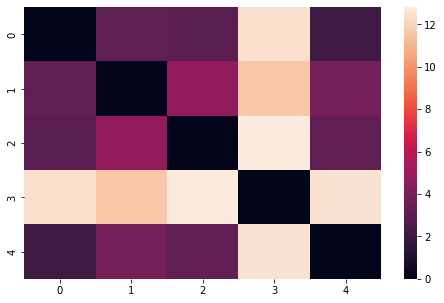

In [179]:
plt.subplots(figsize=(8, 5))
sns.heatmap(euclidean_distance_robust)

In [180]:
from sklearn.metrics import silhouette_score
silhouette_score(df_robust_scaled, df_robust_kmeans.labels_) #k=5

0.1994963906094549

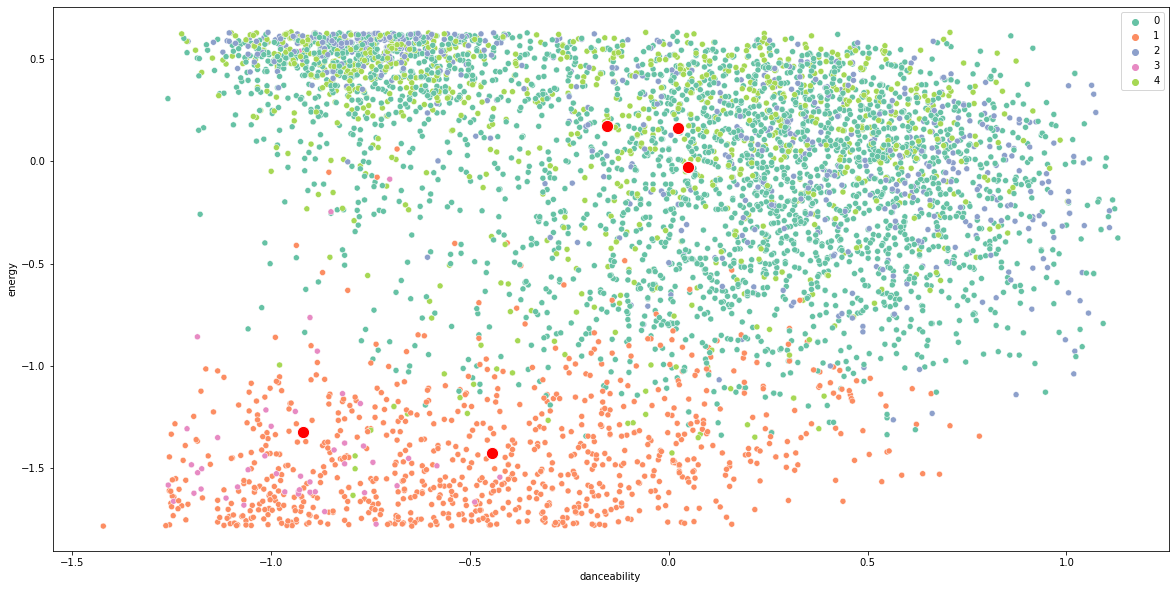

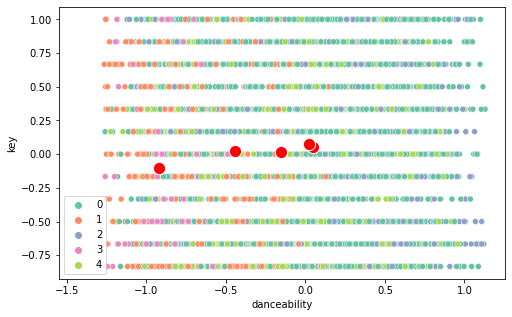

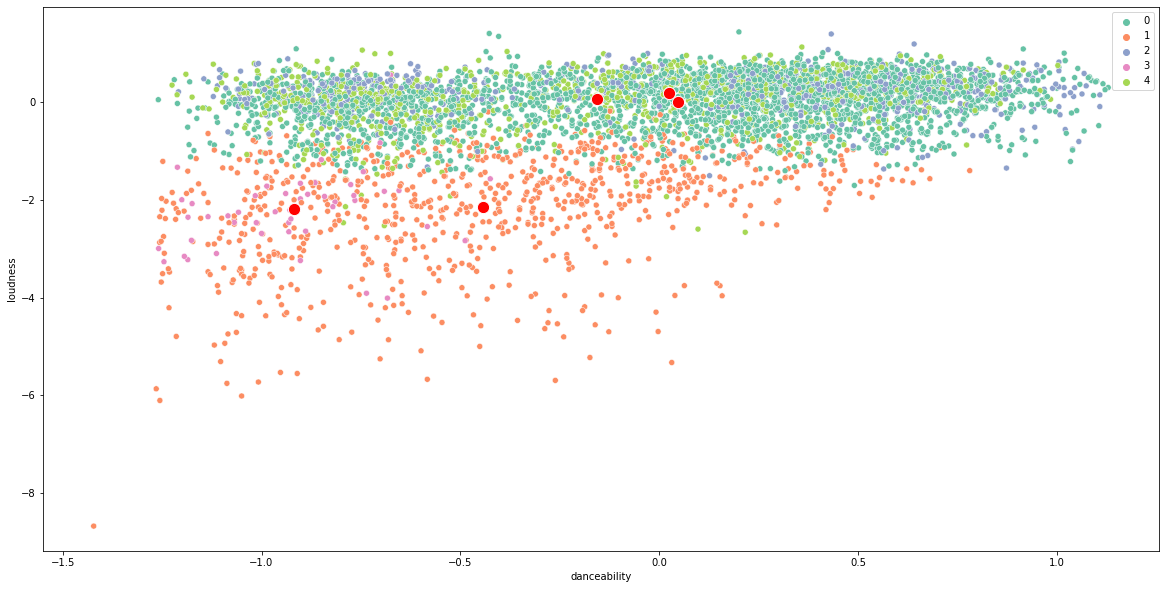

In [181]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
centroids_robust = df_robust_kmeans.cluster_centers_
centroids_robust= pd.DataFrame(centroids_robust)
centroids_robust.columns = columns
centroids_robust.head()

fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_robustScaler, x='danceability', y='energy', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_robust, x='danceability', y='energy', color='red', s=150)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
sns.scatterplot(data=df_robustScaler, x='danceability', y='key', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_robust, x='danceability', y='key', color='red', s=150)
plt.show()


fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=df_robustScaler, x='danceability', y='loudness', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_robust, x='danceability', y='loudness', color='red', s=150)
plt.show()

In [182]:
df_robustScaler['cluster']

name                                                                                                                                                                               artist                                          
Se Eu Quiser Falar Com Deus                                                                                                                                                        Gilberto Gil                                        4
Saudade De Bahia                                                                                                                                                                   Antônio Carlos Jobim                                0
Canta Canta, Minha Gente                                                                                                                                                           Martinho Da Vila                                    2
Mulher Eu Sei                                                            

In [183]:
robust= (
df_robustScaler.reset_index()
    .groupby(['cluster'])
    .agg({'name':'count'}) 
    .reset_index()
    .sort_values('name', ascending=False)
)
robust.rename(columns={'name':'RobustScalar'}, inplace=True)
robust

,cluster,RobustScalar
0,0,2825
4,4,930
1,1,831
2,2,600
3,3,49


In [184]:
clustered_songs_info = minmax.merge(standard,how ='left').merge(robust,how ='left')
clustered_songs_info

,cluster,MinMaxScalar,StandardScalar,RobustScalar
0,1,1823,1135,831
1,0,1058,740,2825
2,3,815,1575,49
3,2,657,358,600
4,4,394,939,930


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

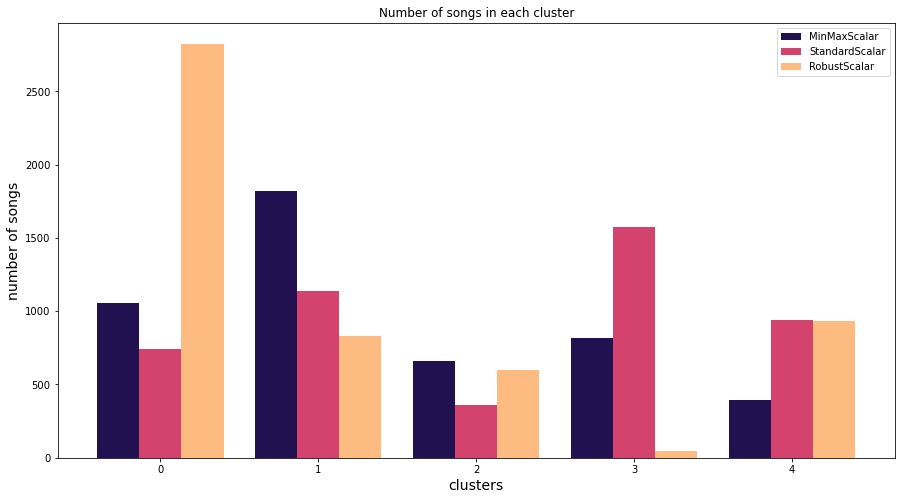

In [185]:
# Data Visualisation
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

# plot data in grouped manner of bar type
cmap = ListedColormap(sns.color_palette('magma')) 
clustered_songs_info.sort_values("cluster").plot(x='cluster',
        kind='bar',
        stacked=False,
        width = 0.8,
        figsize=(15,8),
        cmap= cmap,
        title='Number of songs in each cluster')
plt.xlabel('clusters', fontsize=14 , )
plt.ylabel('number of songs', fontsize=14)
plt.xticks(rotation = 360)

# The drawbacks of K-means are :
needs linear separability of the clusters.
need to specify the number of clusters.
centroids are very close to other centroids.

https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages


# correlation matrix

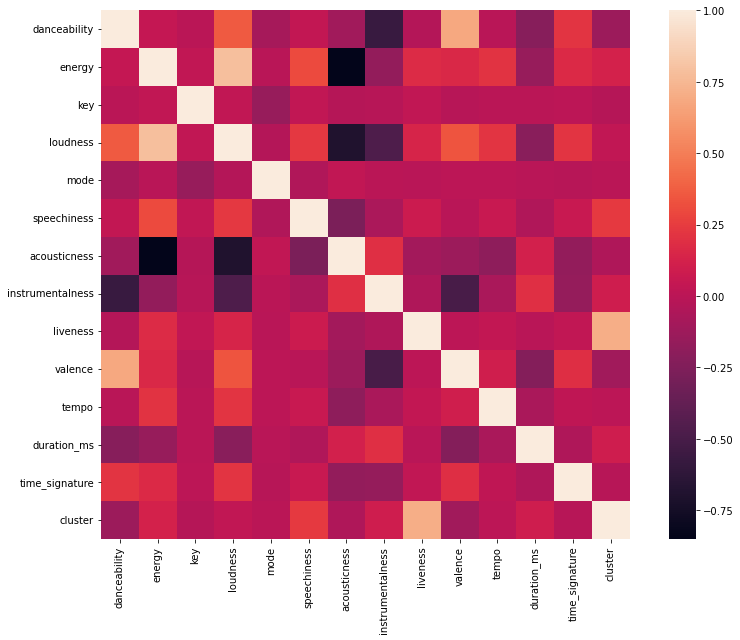

In [186]:
# creating a correlation matrix
corr = df_robustScaler.corr()

# plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))

sns.heatmap(corr, square=True, linecolor='white', vmax=1.0, annot=False,);
plt.tight_layout()